## Robot store
The purpose of this project is to use a simple data base to make a market evaluation. 
The data is from restaurants on Los Angeles, it includes their address, their type, and number of seats.

ESP 
EL proposito de este proyecto es usar una base de datos simple para hacer una evaluacion de mercado. La informacion es sobre restuarantes en los angeles, incluye su direccion, typo, y numero de asientos 

In [1]:
#import relevant libraries 
from scipy import stats as st
import pandas as pd 
from matplotlib import pyplot as plt 
import seaborn as sns
import re

In [2]:
#import the datasets 
#importar los datasets. 
#if downloaded from github use this if not use the ones below 
restData=  pd.read_csv('rest_data_us_upd.csv')


#restData=  pd.read_csv('/datasets/rest_data_us_upd.csv')


In [3]:
#Pre analysis to see the data 
restData.info(show_counts=True)
display (restData)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9651 entries, 0 to 9650
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           9651 non-null   int64 
 1   object_name  9651 non-null   object
 2   address      9651 non-null   object
 3   chain        9648 non-null   object
 4   object_type  9651 non-null   object
 5   number       9651 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 452.5+ KB


,id,object_name,address,chain,object_type,number
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26
1,11787,REILLY'S,100 WORLD WAY 120,False,Restaurant,9
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD 253,False,Fast Food,20
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20
...,...,...,...,...,...,...
9646,21432,HALL OF JUSTICE,217 W TEMPLE AVE,False,Restaurant,122
9647,21433,FIN-MELROSE,5750 MELROSE AVE,False,Restaurant,93
9648,21434,JUICY WINGZ,6741 HOLLYWOOD BLVD,True,Fast Food,15
9649,21435,MEDIDATE COFFEE,548 S SPRING ST STE 100,False,Cafe,6


We see there is a small disparity in chains with some null values, since there are only three of those we are going to drop them 
Esp
Vemos que hay 3 valores no validos en cadena, asi que los vamos a remover 

In [4]:
#first we drop the nun values on chain we lose three values which is acceptable 
restData.dropna(subset=['chain'], inplace=True)

In [5]:
# now we evaluate the proportions of the different types of restaurants 
#Evaluamos la proporcion de los diferentes tipos de restaurantes 
ResTypescount = restData['object_type'].value_counts()

#total de restaurantes 
#Restaurant total 
totalRestaurants = len(restData)

# proportions 
ResTypes = ResTypescount / totalRestaurants

display(ResTypes)




object_type
Restaurant    0.751762
Fast Food     0.110489
Cafe          0.045087
Pizza         0.033064
Bar           0.030265
Bakery        0.029333
Name: count, dtype: float64

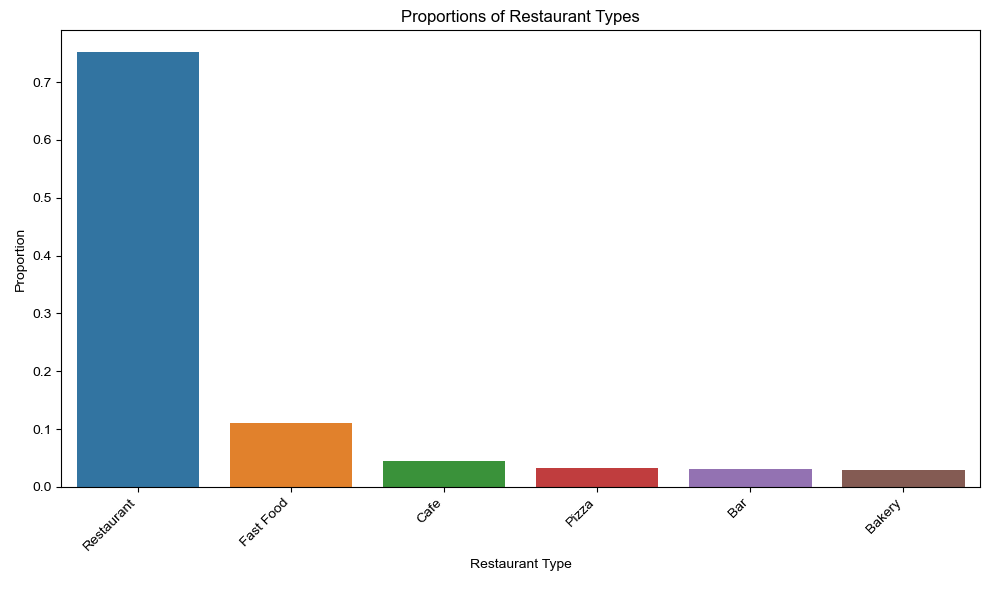

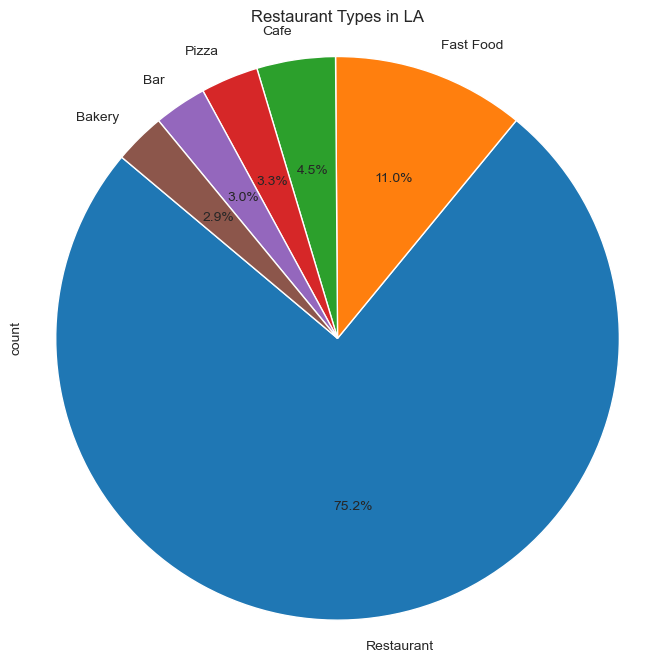

In [6]:
#We graph it so that is easy to show 
plt.figure(figsize=(10, 6))
sns.barplot(x=ResTypes.index, y=ResTypes.values)
plt.title('Proportions of Restaurant Types')
plt.xlabel('Restaurant Type')
plt.ylabel('Proportion')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show
#circular attempts
#circular para mostrar mejor en este caso 
plt.figure(figsize=(8, 8))
sns.set_style("whitegrid")

ResTypes.plot(kind='pie', autopct='%1.1f%%', startangle=140)

plt.title('Restaurant Types in LA')
plt.axis('equal')  
plt.show()

We can see that most of the restaurants are classified as restaurants while fast food, coffe, and others are on the low end. This could show a sampling mistake that could be corrected if the restaurants are better subdivided 
Podemos ver que casi todos son clasificados solamente como restaurantes y algunos como comida rapida, cafe o pizza, esto puede ser resultado de un error de muestreo donde no se dio una clasificacion mas especifica a los restaurantes 

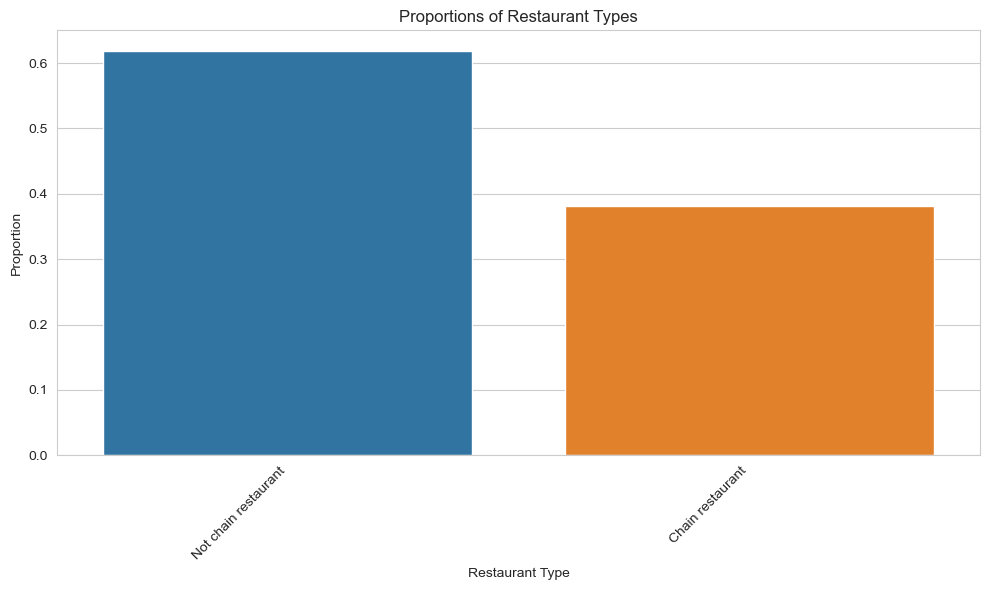

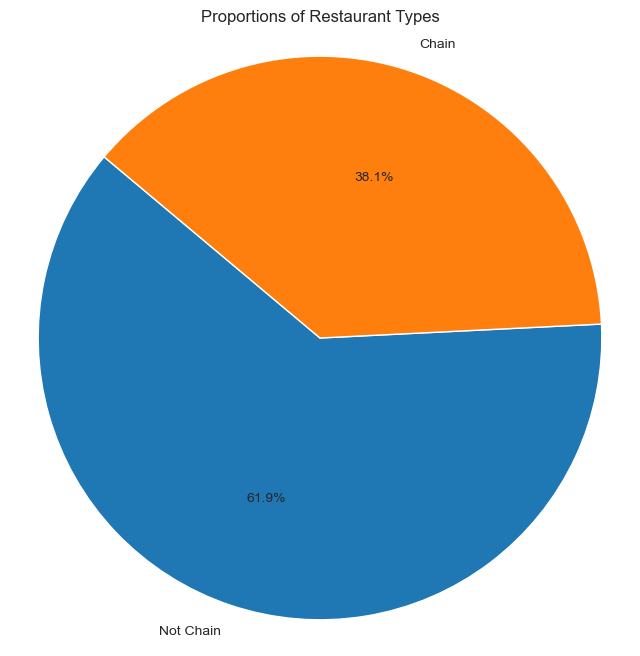

In [7]:
#now the same for the chains 
ChainCount = restData['chain'].value_counts()


ChainProp = ChainCount / len(restData)

plt.figure(figsize=(10, 6))
sns.barplot(x=ChainProp.index, y=ChainProp.values)
plt.xticks(ticks=[0, 1], labels=['Not chain restaurant', 'Chain restaurant'])

plt.title('Proportions of Restaurant Types')
plt.xlabel('Restaurant Type')
plt.ylabel('Proportion')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show



plt.figure(figsize=(8, 8))
plt.pie(ChainProp, labels=['Not Chain', 'Chain'], autopct='%1.1f%%', startangle=140)
plt.title('Proportions of Restaurant Types')
plt.axis('equal') 
plt.show()

In the case of the restaurant types we see that most of them are not part of any chain. 

In [8]:
#now we get the number of chairs in the chain restaurants 
#numero de sillas por restaurante 
chainCountsByType = restData.groupby('object_type')['chain'].sum()

totalRestaurantsByType = restData['object_type'].value_counts()

ChainProportionsType= chainCountsByType / totalRestaurantsByType

ChainProportionsTypeSort = ChainProportionsType.sort_values(ascending=False)

print(ChainProportionsTypeSort)

object_type
Bakery             1.0
Cafe          0.611494
Fast Food     0.567542
Pizza         0.479624
Restaurant    0.316007
Bar           0.263699
dtype: object


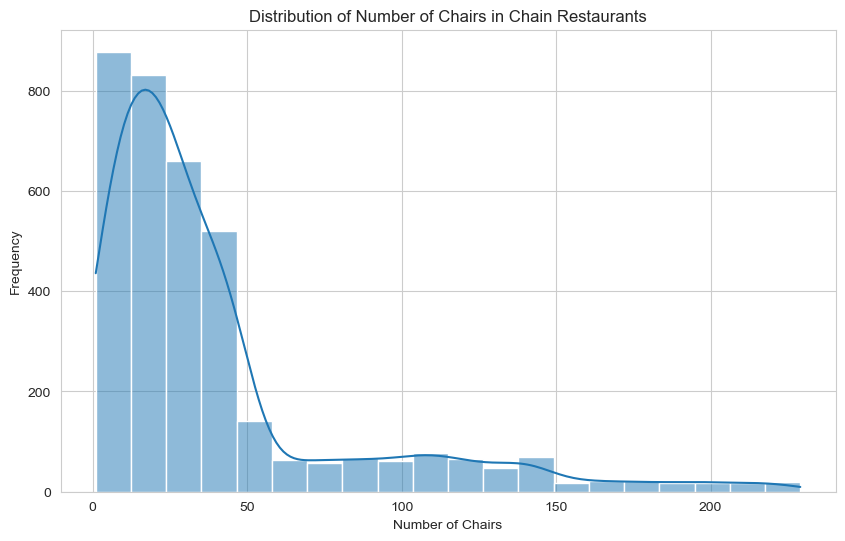

39.69423286180631

In [9]:
ChainRestaurantsAis= restData[restData['chain'] == True]

plt.figure(figsize=(10, 6))
sns.histplot(data=ChainRestaurantsAis, x='number', bins=20, kde=True)
plt.title('Distribution of Number of Chairs in Chain Restaurants')
plt.xlabel('Number of Chairs')
plt.ylabel('Frequency')
plt.show()


# Calculate the average number of chairs in chain restaurants
MediaSillas = ChainRestaurantsAis['number'].mean()

display (MediaSillas)

We see that the average number of chairs is of 39 chairs in most restaurants, while very few restaurants have over 100 

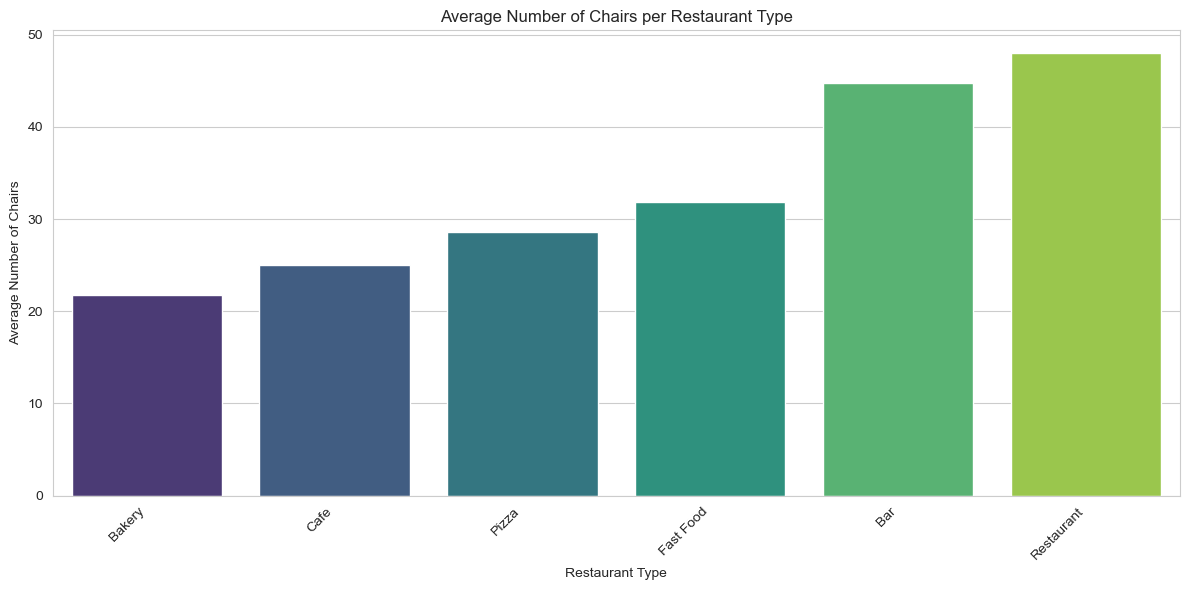

In [10]:
MeanSillasPorTipo = restData.groupby('object_type')['number'].mean().sort_values()

# Plot the number of chairs per restaurant type
plt.figure(figsize=(12, 6))
sns.barplot(x=MeanSillasPorTipo.index, y=MeanSillasPorTipo.values, palette='viridis')
plt.title('Average Number of Chairs per Restaurant Type')
plt.xlabel('Restaurant Type')
plt.ylabel('Average Number of Chairs')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

We see that restaruants and bars are the ones most likely to be above average in the number of chairs with over 40 chairs. 
Vemos que los bares y restaurantes tienen en su mayoria arriba del promedio de 39 en sillas pero sin pasarse de 50 

In [11]:
restDataAddress = restData

In [12]:


# removemos los primeros numeros usando parseo
#we parsee to remove the numbers 
def remove_first_number(address):
    return re.sub(r'\d', '', address, count=4)

# Apply the function to the address column
restDataAddress['street_name'] = restDataAddress['address'].apply(remove_first_number)

# Display the DataFrame with the modified address column
display (restDataAddress.head())

,id,object_name,address,chain,object_type,number,street_name
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26,N EAGLE ROCK BLVD
1,11787,REILLY'S,100 WORLD WAY 120,False,Restaurant,9,WORLD WAY 20
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD 253,False,Fast Food,20,HOLLYWOOD BLVD 253
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22,W SUNSET BLVD
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20,ECHO PARK AVE


street_name
 W SUNSET BLVD     293
 W PICO BLVD       213
 HOLLYWOOD BLVD    167
 W 3RD ST          144
 S VERMONT AVE     140
 BEVERLY BLVD      135
 MELROSE AVE       128
 S FIGUEROA ST     125
 S WESTERN AVE     124
 WILSHIRE BLVD     118
Name: count, dtype: int64

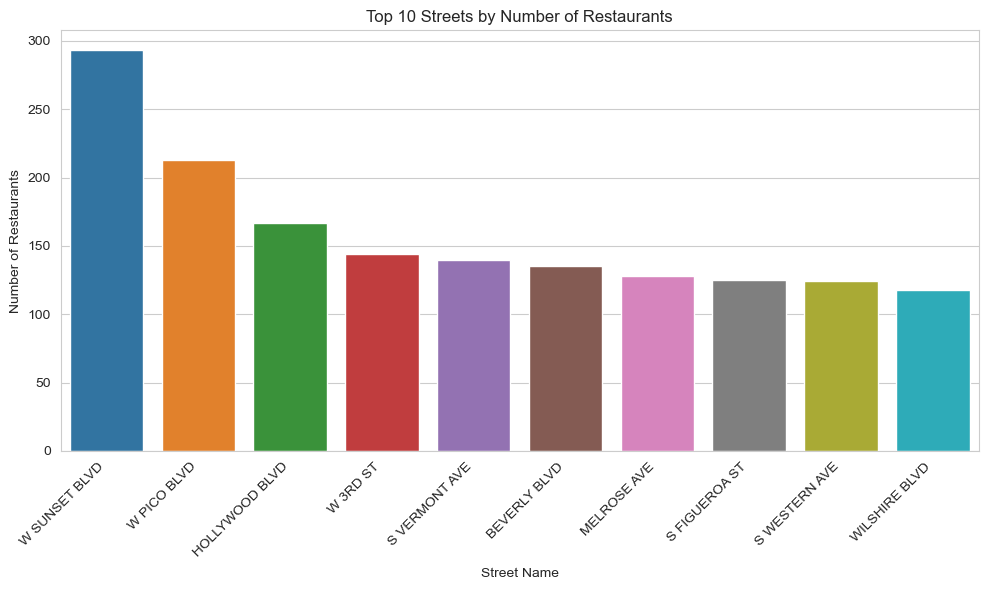

In [13]:
TopStreets = restDataAddress['street_name'].value_counts().head(10)

# Mostramos El top 10 de calles con restaurantes 
#we see the top 10 streets with most restaurants 
display(TopStreets)

plt.figure(figsize=(10, 6))
sns.barplot(x=TopStreets.index, y=TopStreets.values)
plt.title('Top 10 Streets by Number of Restaurants')
plt.xlabel('Street Name')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [14]:
# Number of streets with restaurants
#calles con restaurantes 
StreetRestaurantsList = restDataAddress['street_name'].value_counts()

# Filter out the streets with only one restaurant
#Filter the streets with just one restaruant 
CallesConSoloUno = StreetRestaurantsList[StreetRestaurantsList == 1]

# Count them 
display (len(CallesConSoloUno))


2552

In [15]:
Top10Streets = restDataAddress['street_name'].value_counts().head(10).index

#Now only restaurants on those streets 
RestaurantesTopStreets = restDataAddress[restDataAddress['street_name'].isin(Top10Streets)]

# mean chairs for those 
SillasEnTop = RestaurantesTopStreets['number'].mean()

# Display the estimated average number of chairs
display (SillasEnTop)
MeanChairsOnTopStreets = RestaurantesTopStreets.groupby('street_name')['number'].mean().reset_index()


47.88846880907372

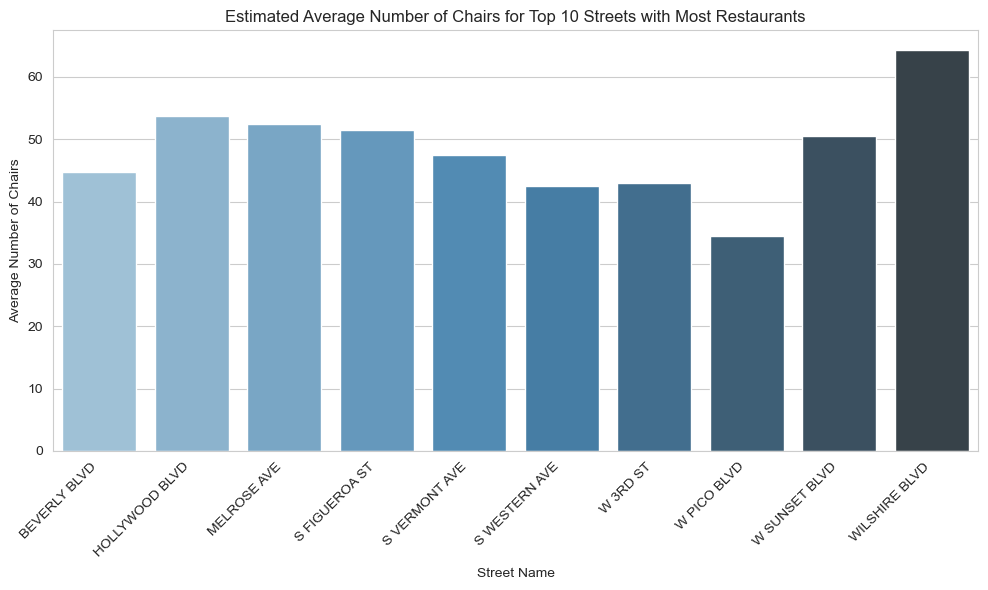

In [16]:
plt.figure(figsize=(10, 6))
sns.barplot(data=MeanChairsOnTopStreets, x='street_name', y='number', palette='Blues_d')
plt.title('Estimated Average Number of Chairs for Top 10 Streets with Most Restaurants')
plt.xlabel('Street Name')
plt.ylabel('Average Number of Chairs')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Conclusions

🔍 Summary of key findings: Sunset Boulevard is the most populous street followed by pico. Most of the data comes from restaurants that are not chains. 

The project results for investment are presented below 

Presentation: https://drive.google.com/file/d/1_11XXpYY4zq8I-FlGrJGY-9b2Q0KW7z_/view?usp=sharing 
 